In [1]:
#initializing workspace
import pandas as pd
import matplotlib.pyplot as plt
import trxtools as tt
import os
from pyCRAC.Parsers import GTF2
import pyBigWig
import numpy as np
from trxtools.BigWig import *
from scipy.signal import argrelextrema

pathTAB = "../seq_references/Saccharomyces_cerevisiae.EF4.74.dna.toplevel.shortChrNames.tab"
pathGTF = "../seq_references/Saccharomyces_cerevisiae.EF4.74.shortChNames_with_PolIII_transcripts_extended_slop_intergenic_sort.gtf"
gtf = GTF2.Parse_GTF()
gtf.read_GTF(pathGTF)
gtf.read_TAB(pathTAB)

sequences = pd.read_csv(pathTAB, sep='\t',names=['chr','sequence'],index_col=0)
chr_len = sequences['sequence'].str.len()

pathDir = "../04_BigWig/"
pathMeta = "../06_metadata/"

dinucleotides = pd.read_csv(pathMeta+'/properties_of_dinucleotides.csv', index_col=0)
dinucleotides.index = dinucleotides.reset_index().index.astype(str)+"_"+dinucleotides.index

cleavage_sites = {"5' end" : (300),
                   'A0' : (300+609),
                   'A1' : (300+700),
                   'D'  : (300+2500),
                   'A2' : (300+2712),
                   'A3' : (300+2784),
                   'B1L': (300+2855),
                   'B1S': (300+2861),
                   'E'  : (300+3019),
                   'C1' : (300+3251),
                   'B2' : (300+6647),
                   'B0-1' : (300+6661),
                   'B0-2' : (300+6697),
                   'T1' : (300+6739)}

print(gtf.strand("RDN37-1"), gtf.chromosome("RDN37-1"), gtf.chromosomeCoordinates("RDN37-1"))
print(gtf.strand("RDN37-2"), gtf.chromosome("RDN37-2"), gtf.chromosomeCoordinates("RDN37-2"))

/home/tturowski/anaconda3/lib/python3.9/site-packages/trxtools/plotting.py:485: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  def plotAndFolding(df=pd.DataFrame(),dG=pd.Series(), title="", start=None, stop=None,


- chrXII (451785, 457732)
- chrXII (460922, 466869)


# Rpa190

In [2]:
flank = 1000

seq1_flank = tt.methods.reverse_complement(sequences.loc['chrXII'][0][451785-flank:457732+flank])
seq2_flank = tt.methods.reverse_complement(sequences.loc['chrXII'][0][460922-flank:466869+flank])

#loading datasets

data_files_3end = [f for f in os.listdir(pathDir) if 'PROFILE_3end' in f and "polyA" not in f and "bw" in f]
data_files_polyA = [f for f in os.listdir(pathDir) if 'PROFILE_3end' in f and "polyA" in f and "bw" in f]

print(len(os.listdir(pathDir)))

print(len(data_files_3end))
print(len(data_files_polyA))

df01a_RDN371_datasets_3end = geneFromBigWig(gene_name="RDN37-1", data_path=pathDir, data_files=data_files_3end, gtf=gtf,ranges=flank)
s1_RDN371_sequence = df01a_RDN371_datasets_3end['nucleotide'] #kee[ for future use
df01b_RDN372_datasets_3end = geneFromBigWig(gene_name="RDN37-2", data_path=pathDir, data_files=data_files_3end, gtf=gtf,ranges=flank)
df01_RDN37_3end = df01a_RDN371_datasets_3end.drop('nucleotide',axis='columns') + df01b_RDN372_datasets_3end.drop('nucleotide',axis='columns')

df03a_RDN371_datasets_polyA = geneFromBigWig(gene_name="RDN37-1", data_path=pathDir, data_files=data_files_polyA, gtf=gtf,ranges=flank)
df03b_RDN372_datasets_polyA = geneFromBigWig(gene_name="RDN37-2", data_path=pathDir, data_files=data_files_polyA, gtf=gtf,ranges=flank)
df03_RDN37_polyA = df03a_RDN371_datasets_polyA.drop('nucleotide',axis='columns') + df03b_RDN372_datasets_polyA.drop('nucleotide',axis='columns')

816
162
162


In [3]:
df11_Rpa190_3end = tt.profiles.preprocess(df01_RDN37_3end,
                                     let_in=['Rpa190HTP'], 
                                     let_out=['hmo1','0s','25rDNA','UVA'],stats=True)

peaks = tt.profiles.findPeaks(df11_Rpa190_3end['median'][:7200],order=45,window=80)

Experiments: 
['XX000000_Rpa190HTP_wt_none_6_PROFILE_3end', 'XX000000_Rpa190HTP_wt_none_3_PROFILE_3end', 'XX000000_Rpa190HTP_wt_none_2_PROFILE_3end', 'XX000000_Rpa190HTP_wt_none_1_PROFILE_3end', 'XX000000_Rpa190HTP_wt_none_4_PROFILE_3end', 'XX000000_Rpa190HTP_wt_none_5_PROFILE_3end']


In [4]:
df31_Rpa190_3end = tt.profiles.preprocess(df01_RDN37_3end,let_in=['Rpa190HTP'], 
                                     let_out=['hmo1','0s','25rDNA','UVA'],stats=False, 
                                     smooth=False,pseudocounts_param=False, ntotal_param=False)

df32_Rpa190_3end_polyA = tt.profiles.preprocess(df03_RDN37_polyA,let_in=['Rpa190HTP'], 
                                     let_out=['hmo1','0s','25rDNA','UVA'],stats=False,
                                     smooth=False,pseudocounts_param=False, ntotal_param=False)

Experiments: 
['XX000000_Rpa190HTP_wt_none_6_PROFILE_3end', 'XX000000_Rpa190HTP_wt_none_3_PROFILE_3end', 'XX000000_Rpa190HTP_wt_none_2_PROFILE_3end', 'XX000000_Rpa190HTP_wt_none_1_PROFILE_3end', 'XX000000_Rpa190HTP_wt_none_4_PROFILE_3end', 'XX000000_Rpa190HTP_wt_none_5_PROFILE_3end']
Experiments: 
['XX000000_Rpa190HTP_wt_none_1_PROFILE_3end_polyA', 'XX000000_Rpa190HTP_wt_none_6_PROFILE_3end_polyA', 'XX000000_Rpa190HTP_wt_none_4_PROFILE_3end_polyA', 'XX000000_Rpa190HTP_wt_none_2_PROFILE_3end_polyA', 'XX000000_Rpa190HTP_wt_none_5_PROFILE_3end_polyA', 'XX000000_Rpa190HTP_wt_none_3_PROFILE_3end_polyA']


<AxesSubplot:>

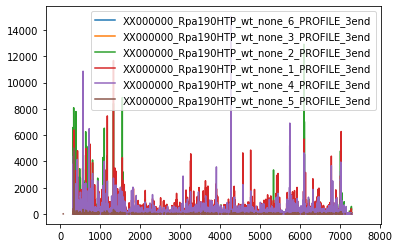

In [5]:
df31_Rpa190_3end.plot()

<AxesSubplot:>

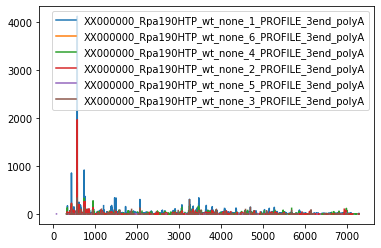

In [6]:
df32_Rpa190_3end_polyA.plot()

Experiments: 
['XX000000_Rpa190HTP_wt_none_1_PROFILE_3end', 'XX000000_Rpa190HTP_wt_none_2_PROFILE_3end', 'XX000000_Rpa190HTP_wt_none_3_PROFILE_3end', 'XX000000_Rpa190HTP_wt_none_4_PROFILE_3end', 'XX000000_Rpa190HTP_wt_none_5_PROFILE_3end', 'XX000000_Rpa190HTP_wt_none_6_PROFILE_3end']


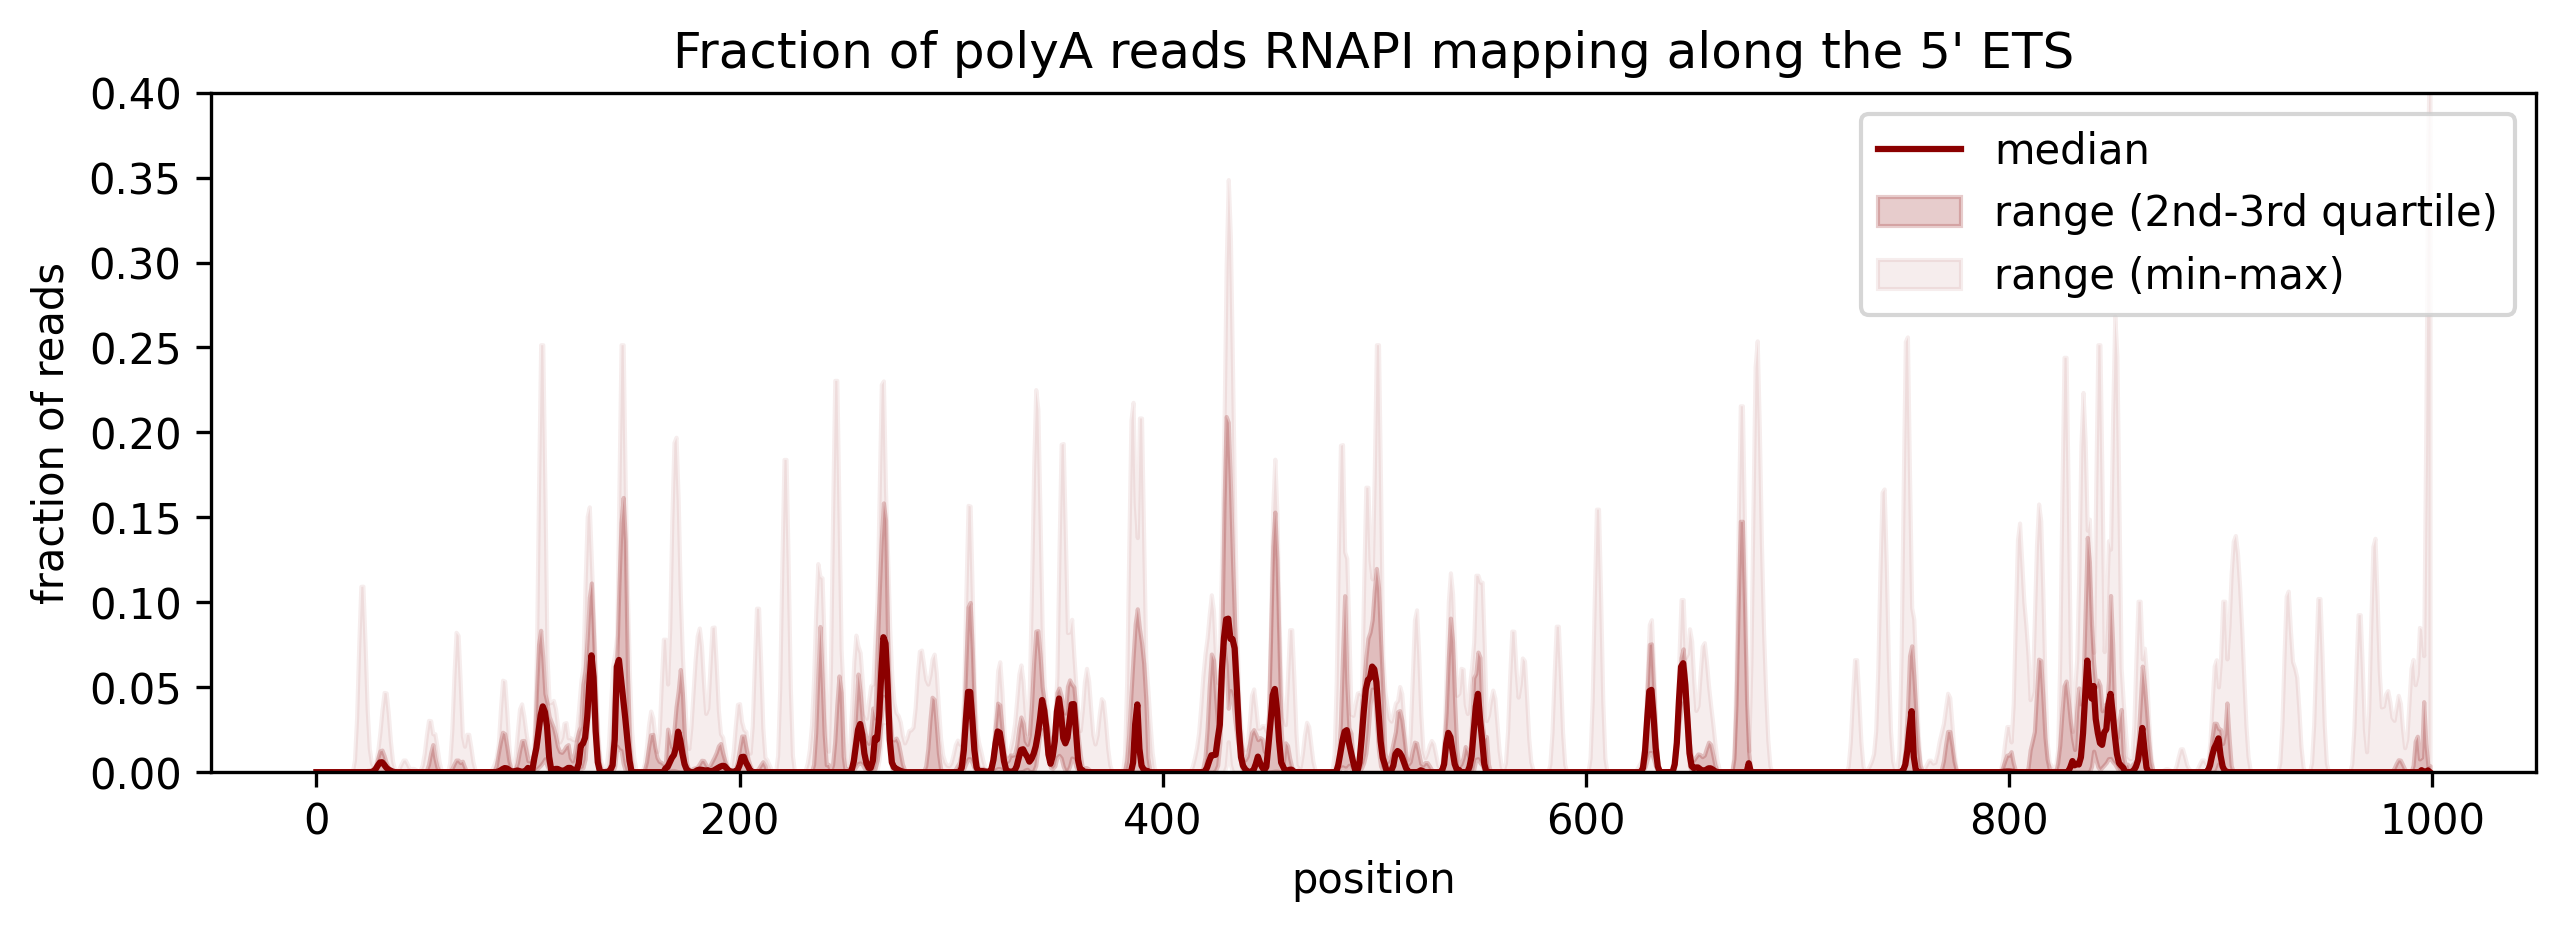

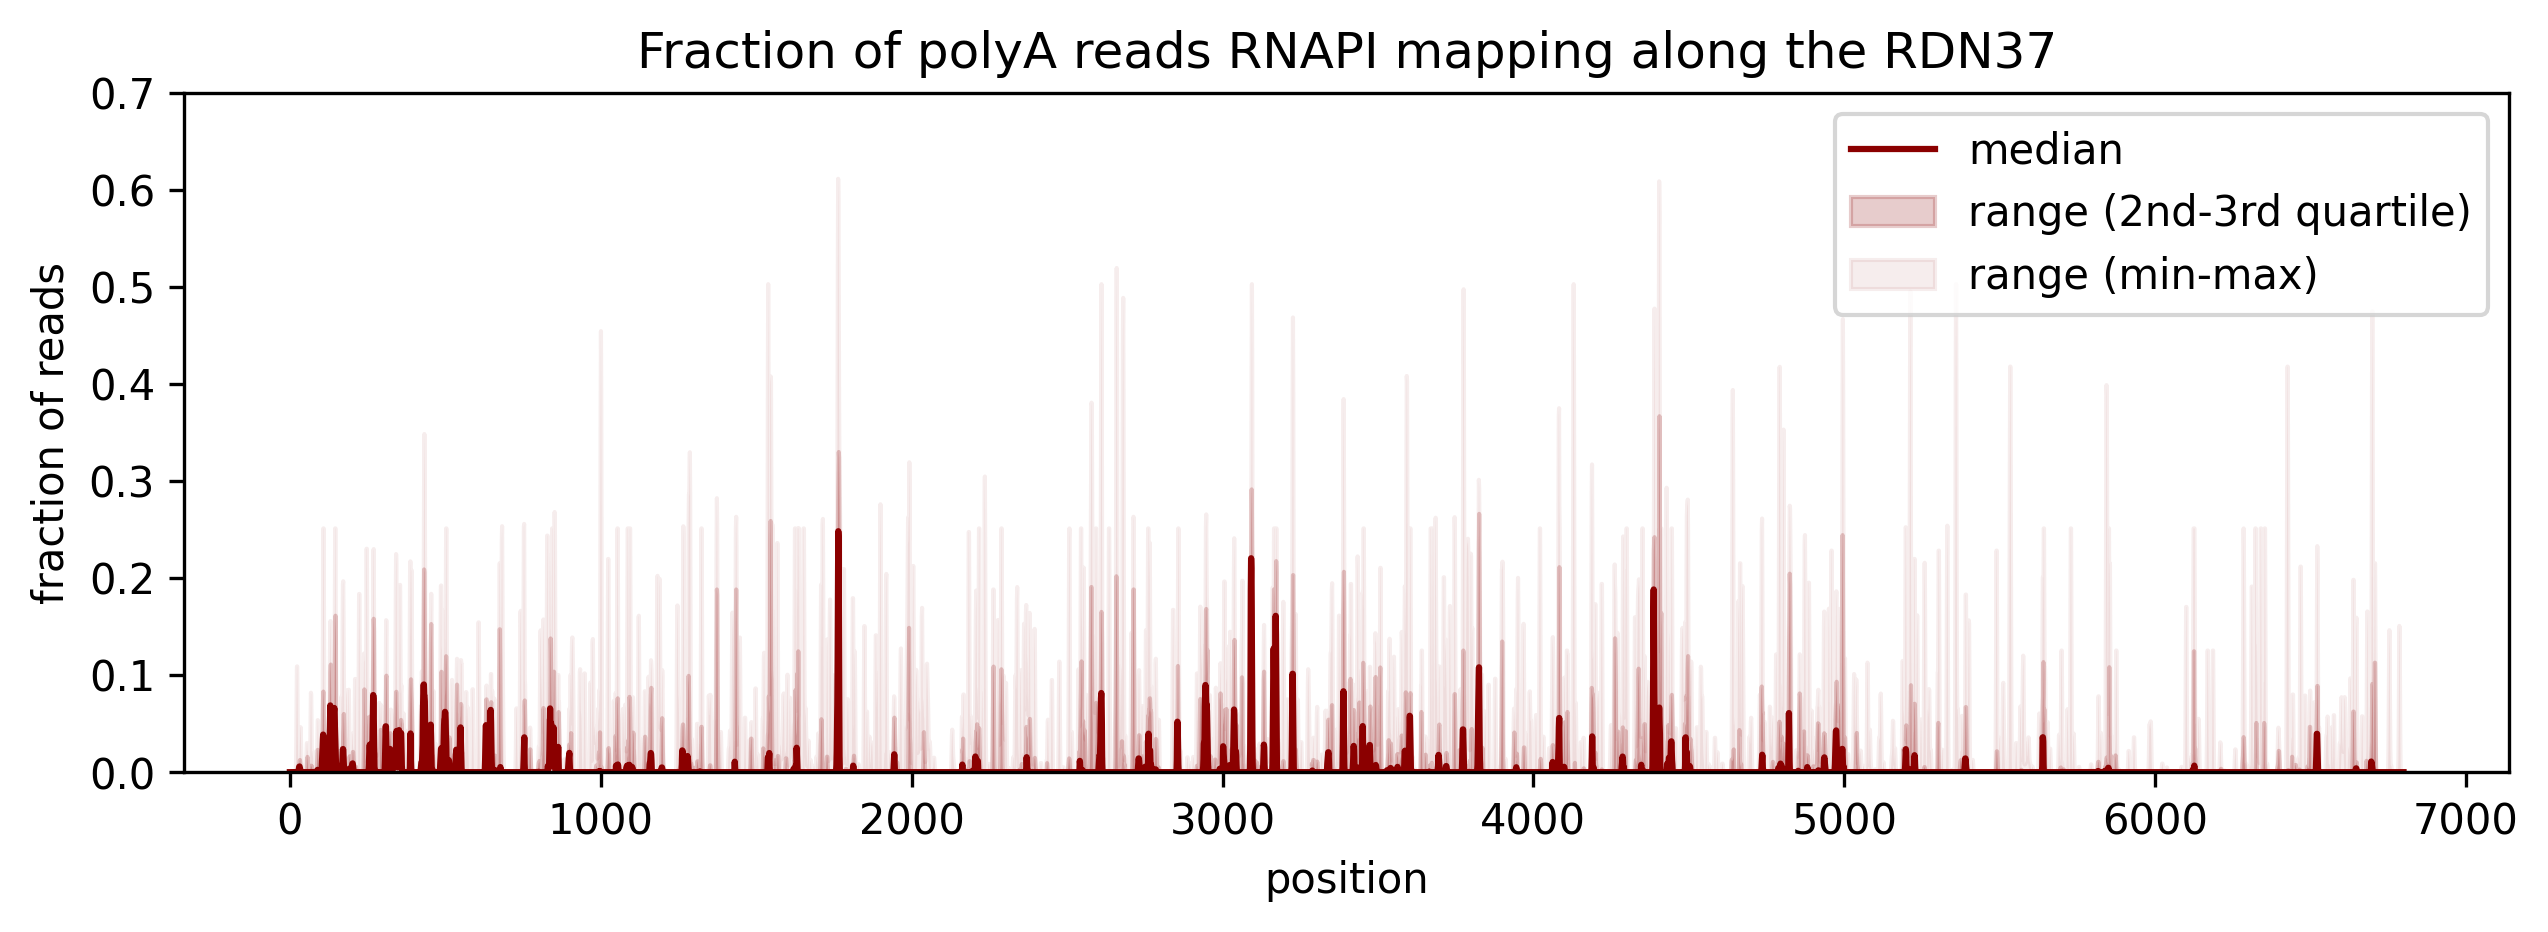

In [7]:
df32_Rpa190_3end_polyA.columns = [i.replace("_polyA","") for i in df32_Rpa190_3end_polyA.columns]
df33_Rpa190_fractionPolyA = df32_Rpa190_3end_polyA / df31_Rpa190_3end

df34_polyA = tt.profiles.preprocess(df33_Rpa190_fractionPolyA.fillna(0.0),let_in=['Rpa190HTP'], 
                                     let_out=['hmo1','0s','25rDNA','UVA'],stats=True,
                                     smooth=True,pseudocounts_param=False, ntotal_param=False)

tt.plotting.plot_as_box_plot(df34_polyA, title="Fraction of polyA reads RNAPI mapping along the 5' ETS",
                             dpi=300,ylim=(None,0.4), start=0+300, stop=1000+300,color='darkred',figsize=(10,3),
                             offset=300,fname='Fig_5A.png')

tt.plotting.plot_as_box_plot(df34_polyA, title="Fraction of polyA reads RNAPI mapping along the RDN37",
                             dpi=300,ylim=(None,0.7), start=0+300, stop=6800+300,color='darkred',figsize=(10,3),
                             offset=300,fname='Fig_S5A.png')

In [8]:
window = 85

tt.plotting.plotCumulativePeaks(df11_Rpa190_3end, df2=df34_polyA, local_pos=peaks, dpi=300,
                        title="polyA reads (5'ETS)", start=None, stop=1000, window=window, figsize=(4,3),
                        color1='green', color2="darkred", lc='green',fname="Fig_5B.png")

tt.plotting.plotCumulativePeaks(df11_Rpa190_3end, df2=df34_polyA, local_pos=peaks, dpi=300,
                        title="polyA reads (RDN37)", start=None, stop=7100, window=window, figsize=(4,3),
                        color1='green', color2="darkred", lc='green',fname="Fig_S5B.png")

AttributeError: module 'trxtools.plotting' has no attribute 'plotCumulativePeaks'

# Rpa135 wt and Rpa12dC

In [ ]:
df41_Rpa135_3end = tt.profiles.preprocess(df01_RDN37_3end,let_in=['Rpa135HTP_wt'], 
                                     let_out=["noUV",'C18','C20'],stats=False, 
                                     smooth=False,pseudocounts_param=False, ntotal_param=False)

df42_Rpa135_3end_polyA = tt.profiles.preprocess(df03_RDN37_polyA,let_in=['Rpa135HTP_wt'], 
                                     let_out=["noUV",'C18','C20'],stats=False,
                                     smooth=False,pseudocounts_param=False, ntotal_param=False)

df51_Rpa135_Rpa12dC_3end = tt.profiles.preprocess(df01_RDN37_3end,let_in=['Rpa135HTP_Rpa12dC'], 
                                     let_out=["noUV",'C18','C20'],stats=False, 
                                     smooth=False,pseudocounts_param=False, ntotal_param=False)

df52_Rpa135_Rpa12dC_3end_polyA = tt.profiles.preprocess(df03_RDN37_polyA,let_in=['Rpa135HTP_Rpa12dC'], 
                                     let_out=["noUV",'C18','C20'],stats=False,
                                     smooth=False,pseudocounts_param=False, ntotal_param=False)

df42_Rpa135_3end_polyA.columns = [i.replace("_polyA","") for i in df42_Rpa135_3end_polyA.columns]
df43_Rpa135_fractionPolyA = df42_Rpa135_3end_polyA / df41_Rpa135_3end

df52_Rpa135_Rpa12dC_3end_polyA.columns = [i.replace("_polyA","") for i in df52_Rpa135_Rpa12dC_3end_polyA.columns]
df53_Rpa135_Rpa12dC_fractionPolyA = df52_Rpa135_Rpa12dC_3end_polyA / df51_Rpa135_Rpa12dC_3end

df44_polyA = tt.profiles.preprocess(df43_Rpa135_fractionPolyA.fillna(0.0),let_in=['Rpa135HTP_wt'],
                                     let_out=["noUV",'C18','C20'],stats=True,
                                     smooth=True,pseudocounts_param=False, ntotal_param=False)

df54_Rpa12dC_polyA = tt.profiles.preprocess(df53_Rpa135_Rpa12dC_fractionPolyA.fillna(0.0),let_in=['Rpa135HTP_Rpa12dC'],
                                     let_out=["noUV",'C18','C20'],stats=True,
                                     smooth=True,pseudocounts_param=False, ntotal_param=False)

tt.plotting.plot_as_box_plot(df44_polyA, title="Fraction of polyA reads RNAPI (wt) mapping along RDN37",
                             dpi=300,ylim=(None,0.7), start=0+300, stop=6800+300,color='darkred',figsize=(10,3),
                             offset=300,fname='Fig_Z_polyA_wt.png')

tt.plotting.plot_as_box_plot(df54_Rpa12dC_polyA, title="Fraction of polyA reads RNAPI (Rpa12dC) mapping along RDN37",
                             dpi=300,ylim=(None,0.7), start=0+300, stop=6800+300,color='darkred',figsize=(10,3),
                             offset=300,fname='Fig_Z_polyA_a12dC.png')

In [ ]:
# for s in [0,1,2,3,4,5,6,7]:
#     start = (s*1000)+300
#     stop = ((s+1)*1000)+300

for x,y in [(0,700),(2000,2800),(3000,3400),(6000,6800)]:
    start = x+300
    stop = y+300
    tt.plotting.plot_diff(ref=df44_polyA, dataset=df54_Rpa12dC_polyA,figsize=(10,3),label1="wt",label2="Rpa12dC",
                           title="polyA 3' ends Rpa135 along XYZ (wt vs Rpa12dC)",plot_ranges=False,
                           dpi=300,offset=300, ylim=(0,0.4),ranges='mm',
                           h_lines=[i-300 for i in cleavage_sites.values() if i < stop],
                           start=start, stop=stop, fname='Fig_Z_polyA_diff'+str(start)+'.png')

In [ ]:
wt = df44_polyA
a12dC = df54_Rpa12dC_polyA

data = [wt['median'].dropna().tolist(),a12dC['median'].dropna().tolist()]
labels=["wt","Rpa12dC"]

tt.plotting.boxplot1(data,labels,grid=True,log=True,figsize=(5,3),dpi=300,fname='Fig_Z_polyA_diff_boxplot.png',
                     title="Fraction of polyA reads")

from scipy import stats

out = stats.wilcoxon(wt['median'].fillna(0.0),a12dC['median'].fillna(0.0))
print(out[1])
out = stats.ranksums(wt['median'].fillna(0.0),a12dC['median'].fillna(0.0))
print(out[1])

In [ ]:
pd.DataFrame(data=data, index=labels).sum(1)

# RDN37-2

In [ ]:
flank = 2000

#loading datasets

data_files_3end = [f for f in os.listdir(pathDir) if 'PROFILE_3end' in f and "polyA" not in f and "bw" in f]
data_files_polyA = [f for f in os.listdir(pathDir) if 'PROFILE_3end' in f and "polyA" in f and "bw" in f]

print(len(os.listdir(pathDir)))

print(len(data_files_3end))
print(len(data_files_polyA))

df01b_RDN372_datasets_3end = geneFromBigWig(gene_name="RDN37-2", data_path=pathDir, data_files=data_files_3end, gtf=gtf,ranges=flank)
df03b_RDN372_datasets_polyA = geneFromBigWig(gene_name="RDN37-2", data_path=pathDir, data_files=data_files_polyA, gtf=gtf,ranges=flank)

df41_Rpa135_3end = tt.profiles.preprocess(df01b_RDN372_datasets_3end,let_in=['Rpa135HTP_wt'], 
                                     let_out=["noUV",'C18','C20'],stats=False, 
                                     smooth=False,pseudocounts_param=False, ntotal_param=False)

df42_Rpa135_3end_polyA = tt.profiles.preprocess(df03b_RDN372_datasets_polyA,let_in=['Rpa135HTP_wt'], 
                                     let_out=["noUV",'C18','C20'],stats=False,
                                     smooth=False,pseudocounts_param=False, ntotal_param=False)

df51_Rpa135_Rpa12dC_3end = tt.profiles.preprocess(df01b_RDN372_datasets_3end,let_in=['Rpa135HTP_Rpa12dC'], 
                                     let_out=["noUV",'C18','C20'],stats=False, 
                                     smooth=False,pseudocounts_param=False, ntotal_param=False)

df52_Rpa135_Rpa12dC_3end_polyA = tt.profiles.preprocess(df03b_RDN372_datasets_polyA,let_in=['Rpa135HTP_Rpa12dC'], 
                                     let_out=["noUV",'C18','C20'],stats=False,
                                     smooth=False,pseudocounts_param=False, ntotal_param=False)

df42_Rpa135_3end_polyA.columns = [i.replace("_polyA","") for i in df42_Rpa135_3end_polyA.columns]
df43_Rpa135_fractionPolyA = df42_Rpa135_3end_polyA / df41_Rpa135_3end

df52_Rpa135_Rpa12dC_3end_polyA.columns = [i.replace("_polyA","") for i in df52_Rpa135_Rpa12dC_3end_polyA.columns]
df53_Rpa135_Rpa12dC_fractionPolyA = df52_Rpa135_Rpa12dC_3end_polyA / df51_Rpa135_Rpa12dC_3end

df44_polyA = tt.profiles.preprocess(df43_Rpa135_fractionPolyA.fillna(0.0),let_in=['Rpa135HTP_wt'],
                                     let_out=["noUV",'C18','C20'],stats=True,
                                     smooth=True,pseudocounts_param=False, ntotal_param=False)

df54_Rpa12dC_polyA = tt.profiles.preprocess(df53_Rpa135_Rpa12dC_fractionPolyA.fillna(0.0),let_in=['Rpa135HTP_Rpa12dC'],
                                     let_out=["noUV",'C18','C20'],stats=True,
                                     smooth=True,pseudocounts_param=False, ntotal_param=False)

tt.plotting.plot_as_box_plot(df44_polyA, title="Fraction of polyA reads RNAPI (wt) mapping along RDN37-2",
                             dpi=300,ylim=(None,0.7), start=0+1300, stop=7900+1300,color='darkred',figsize=(10,3),
                             offset=300,fname='Fig_Z_RDN37-2_polyA_wt.png')

tt.plotting.plot_as_box_plot(df54_Rpa12dC_polyA, title="Fraction of polyA reads RNAPI (Rpa12dC) mapping along RDN37-2",
                             dpi=300,ylim=(None,0.7), start=0+1300, stop=7900+1300,color='darkred',figsize=(10,3),
                             offset=300,fname='Fig_Z_RDN37-2_polyA_a12dC.png')

start=6600+1300
stop=7900+1300

tt.plotting.plot_diff(ref=df44_polyA, dataset=df54_Rpa12dC_polyA,figsize=(10,3),label1="wt",label2="Rpa12dC",
                           title="polyA 3' ends Rpa135 along RDN37-2 (wt vs Rpa12dC)",plot_ranges=False,
                           dpi=300,offset=1300, ylim=(0,0.4),ranges='mm',
                           h_lines=[i-1300 for i in cleavage_sites.values() if i < stop],
                           start=start, stop=stop, fname='Fig_Z_RDN37-2_readtrough_diff.png')